In [3]:
!unzip "/content/drive/MyDrive/IDRID_MESSIDOR01.zip"

Archive:  /content/drive/MyDrive/IDRID_MESSIDOR01.zip
   creating: IDRID_MESSIDOR01/Dataset/
   creating: IDRID_MESSIDOR01/Dataset/TestSet/
   creating: IDRID_MESSIDOR01/Dataset/TestSet/0/
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_001.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_003.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_005.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_007.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_029.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_030.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_031.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_037.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_038.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_039.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_041.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestSet/0/IDRiD_043.jpg  
  inflating: IDRID_MESSIDOR01/Dataset/TestS

In [ ]:
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp

def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
# Color Transormation
def ColorTransition(Simg, Timg):
    R, G, B=cv2.split(Simg)
    R = np.float64(R)
    G = np.float64(G)
    B = np.float64(B)
 
    R1, G1, B1=cv2.split(Timg)
    R1 = np.float64(R1)
    G1 = np.float64(G1)
    B1 = np.float64(B1)
 
    # conversion from RGB to lab color space -> Source Image
    L=0.3811*R+0.5783*G+0.0402*B;
    M=0.1967*R+0.7244*G+0.0782*B;
    S=0.0241*R+0.1288*G+0.8444*B;
    L = np.float64(L)
    M = np.float64(M)
    S = np.float64(S)
 
    # conversion from RGB to lab color space -> Target Image
    L1=0.3811*R1+0.5783*G1+0.0402*B1;
    M1=0.1967*R1+0.7244*G1+0.0782*B1;
    S1=0.0241*R1+0.1288*G1+0.8444*B1;
    L1 = np.float64(L1)
    M1 = np.float64(M1)
    S1 = np.float64(S1)
 
    I2 = cv2.merge((L,M,S))
    A2 = cv2.merge((L1,M1,S1))
    
    l=0.5774*L+0.5774*M+0.5774*S;
    a=0.4082*L+0.4082*M-0.8165*S;
    b=0.7071*L-0.7071*M;
    l = np.float64(l)
    a = np.float64(a)
    b = np.float64(b)
 
    l1=0.5774*L1+0.5774*M1+0.5774*S1;
    a1=0.4082*L1+0.4082*M1-0.8165*S1;
    b1=0.7071*L1-0.7071*M1;
    l1 = np.float64(l1)
    a1 = np.float64(a1)
    b1 = np.float64(b1)
 
    I3 = cv2.merge((l,a,b))
    A3 = cv2.merge((l1,a1,b1))
 
    std1=std(l1);
    std2=std(l);
 
    std3=std(a1);
    std4=std(a);
    
    std5=std(b1);
    std6=std(b);
 
    p=(sqrt(mean(l1))-(sqrt(mean(l))))/(sqrt(mean(l1))+(sqrt(mean(l))));   
    s=0
    if p>0:    
        s=0.9-(0.9 - 0.15)/(1+exp((p-0.45)/(0.05)));
    else:
        s=0.15;
 
    l2=mean(mean(l1))+(l-mean(mean(l)))*(1+s);
    a2=mean(mean(a1))+(a-mean(mean(a)));
    b2=mean(mean(b1))+(b-mean(mean(b)));
    l2 = np.float64(l2)
    a2 = np.float64(a2)
    b2 = np.float64(b2)
 
    l3=mean(mean(l1))+(l-mean(mean(l)))*(std1/std2);
    a3=mean(mean(a1))+(a-mean(mean(a)))*(std3/std4);
    b3=mean(mean(b1))+(b-mean(mean(b)))*(std5/std6);
    l3 = np.float64(l3)
    a3 = np.float64(a3)
    b3 = np.float64(b3)
 
    max_l=max(l2);
    min_l=min(l2);
    max_a=max(a2);
    min_a=min(a2);
    max_b=max(b2);
    min_b=min(b2);
  
    I4 = cv2.merge((l2,a2,b2))
 
    # Conversion from lab to RGB color space%
    L2=0.5774*l2+0.4082*a2+0.7071*b2;
    M2=0.5774*l2+0.4082*a2-0.7071*b2;
    S2=0.5774*l2-0.8169*a2;
    L2 = np.float64(L2)
    M2 = np.float64(M2)
    S2 = np.float64(S2)
 
    R2=4.4679*L2-3.5873*M2+0.1193*S2;
    G2=-1.2186*L2+2.3809*M2-0.1624*S2;
    B2=0.0497*L2-0.2439*M2+1.2045*S2;
 
    I5 = cv2.merge((R1, G2, B2))
    I6 = cv2.merge((l3,a3,b3))
 
    # Conversion from lab to RGB color space%
    L3=0.5774*l3+0.4082*a3+0.7071*b3;
    M3=0.5774*l3+0.4082*a3-0.7071*b3;
    S3=0.5774*l3-0.8169*a3;
    L3 = np.float64(L3)
    M3 = np.float64(M3)
    S3 = np.float64(S3)
 
    R3=4.4679*L3-3.5873*M3+0.1193*S3;
    G3=-1.2186*L3+2.3809*M3-0.1624*S3;
    B3=0.0497*L3-0.2439*M3+1.2045*S3;
    # R3 = np.float64(R3)
    # G3 = np.float64(G3)
    # B3 = np.float64(B3)
 
    I7 = cv2.merge((R3,G3,B3))
    I7 = normalize(I7)
    return I7


def preProcessing(img):
    # Target = cv2.imread(train_path+'/0/IDRiD_061.jpg')
    Target = cv2.imread('20051020_45137_0100_PP.tif')
    Target = cv2.cvtColor(Target, cv2.COLOR_BGR2RGB)
    Target = cv2.resize(Target, (400, 400))
   # print(filename)
   # img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = ColorTransition(img, Target)
    img = normalize(img)
    return img
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
from tensorflow.keras.regularizers import l2

import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications.inception_resnet_v2 import InceptionResNetV2
print("Done Importing")

with tf.device('/device:GPU:0'):
    image_gen=ImageDataGenerator(zca_epsilon=1e-06,rotation_range=80,width_shift_range=2.0,height_shift_range=2.0,brightness_range=None,shear_range=0.2,zoom_range=0.3,channel_shift_range=0.0,fill_mode="nearest",
        cval=0.0,
        horizontal_flip=True,
        vertical_flip=True,
        rescale=2,
        preprocessing_function=preProcessing)
    
    train=image_gen.flow_from_directory("TrainSet",
                                        target_size=(400, 400),
                                        batch_size=16,
                                        class_mode="categorical")


    test=image_gen.flow_from_directory("TestSet",
                                       target_size=(400, 400),
                                        batch_size=8,
                                        class_mode="categorical")

    ir2=InceptionResNetV2(include_top=False, input_shape=(400, 400, 3))
    print("Model Imported!")
    output = ir2.layers[-1].output
    output = keras.layers.Flatten()(output)
    ir2_model = Model(ir2.input, output)
    count=0
    for layer in ir2_model.layers:
            if(count>400):
                break
            layer.trainable=False
            count+=1
            
    model= Sequential()
    model.add(ir2_model)

    model.add(Dense(512, activation='relu',input_dim=ir2_model.output_shape[1]))
    model.add(Activation("relu"))

    model.add(Dense(256, activation='relu'))
    model.add(Activation("relu"))

    model.add(Dense(128))
    model.add(Activation("relu"))

    model.add(Dense(64))
    model.add(Activation("relu"))

    model.add(Dense(32))
    model.add(Activation("relu"))

    model.add(Dense(2, activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


Done Importing
Found 1587 images belonging to 2 classes.
Found 126 images belonging to 2 classes.
Model Imported!
Epoch 1/70
101/101 [==============================] - 255s 2s/step - loss: 2.0086 - accuracy: 0.6143 - val_loss: 201702.8906 - val_accuracy: 0.5437
Epoch 2/70
101/101 [==============================] - 242s 2s/step - loss: 0.5834 - accuracy: 0.7193 - val_loss: 0.9055 - val_accuracy: 0.5049
Epoch 3/70
101/101 [==============================] - 240s 2s/step - loss: 0.5812 - accuracy: 0.7217 - val_loss: 0.7753 - val_accuracy: 0.4078
Epoch 4/70
101/101 [==============================] - 241s 2s/step - loss: 0.5760 - accuracy: 0.7181 - val_loss: 1.0272 - val_accuracy: 0.4369
Epoch 5/70
101/101 [==============================] - 243s 2s/step - loss: 0.5412 - accuracy: 0.7773 - val_loss: 9.2614 - val_accuracy: 0.5728
Epoch 6/70
101/101 [==============================] - 239s 2s/step - loss: 0.4426 - accuracy: 0.8408 - val_loss: 0.5413 - val_accuracy: 0.7476
Epoch 7/70
101/101 [===

KeyboardInterrupt: 

In [ ]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="best.h5",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
results=model.fit(train,epochs=30,validation_data=test, callbacks=[model_checkpoint_callback])

Epoch 1/30
101/101 [==============================] - 232s 2s/step - loss: 0.1586 - accuracy: 0.9411 - val_loss: 0.3825 - val_accuracy: 0.8544
Epoch 2/30
101/101 [==============================] - 279s 3s/step - loss: 0.1454 - accuracy: 0.9479 - val_loss: 0.6480 - val_accuracy: 0.9058
Epoch 3/30
101/101 [==============================] - 229s 2s/step - loss: 0.1626 - accuracy: 0.9405 - val_loss: 0.6751 - val_accuracy: 0.8947
Epoch 4/30
101/101 [==============================] - 236s 2s/step - loss: 0.1348 - accuracy: 0.9523 - val_loss: 0.9754 - val_accuracy: 0.8750
Epoch 5/30
101/101 [==============================] - 231s 2s/step - loss: 0.1690 - accuracy: 0.9374 - val_loss: 0.4544 - val_accuracy: 0.9147
Epoch 6/30
101/101 [==============================] - 230s 2s/step - loss: 0.2021 - accuracy: 0.9293 - val_loss: 0.6273 - val_accuracy: 0.8647
Epoch 7/30
101/101 [==============================] - 232s 2s/step - loss: 0.1929 - accuracy: 0.9392 - val_loss: 1.3959 - val_accuracy: 0.8858

In [8]:
modelx=keras.models.load_model("/content/drive/MyDrive/best.h5")

/usr/local/lib/python3.7/dist-packages/keras/layers/core.py:1045: UserWarning: tensorflow.python.keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [15]:
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp
import tensorflow as tf
from tensorflow import keras
import os
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
print("Done Importing")

Done Importing


In [20]:
dir1='/content/IDRID_MESSIDOR01/Dataset/TrainSet'
train=os.listdir(dir1)
dir2='/content/IDRID_MESSIDOR01/Dataset/TestSet'
test=os.listdir(dir2)
x_train=[]
y_train=[]
for i in train:
    a=dir1+'/'+i
    f=os.listdir(a)
    for j in f:
            if(j[0]!="."):
                x_train.append(a+"/"+j)
                y_train.append(int(i))
x_test=[]
y_test=[]
for i in test:
        a=dir2+'/'+i
        f=os.listdir(a)
        for j in f:
                if(j[0]!="."):
                    x_test.append(a+"/"+j)
                    y_test.append(int(i))

y_test_pred=[]
y_train_pred=[]

print("done")
for i in range(len(x_train)):
        img = load_img(x_train[i],target_size=(400,400))
        img = img_to_array(img)
        img1=preProcessing(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(modelx.predict(img1))
        y_train_pred.append(a)        
print("train:")
print(confusion_matrix(y_train, y_train_pred))
pr=precision_score(y_train, y_train_pred,average="weighted")
re=recall_score(y_train, y_train_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
print("accuracy:",f"{accuracy_score(y_train, y_train_pred):.4f}")

for i in range(len(x_test)):
        img = load_img(x_test[i],target_size=(400,400))
        img = img_to_array(img)
        img1=preProcessing(img)
        img1 = np.expand_dims(img1, axis=0)
        a=np.argmax(modelx.predict(img1))
        y_test_pred.append(a)    
print("test:")
print(confusion_matrix(y_test, y_test_pred))
pr=precision_score(y_test, y_test_pred,average="weighted")
re=recall_score(y_test, y_test_pred,average="weighted")
print("precision:",f"{pr:.4f}")
print("recall:.",f"{re:.4f}")
print("accuracy:",f"{accuracy_score(y_test, y_test_pred):.4f}")

done
train:
[[1062   81]
 [  20  424]]
precision: 0.9518
recall:. 0.9564
accuracy: 0.9564
test:
[[41  4]
 [ 4 77]]
precision: 0.9365
recall:. 0.9365
accuracy: 0.9365


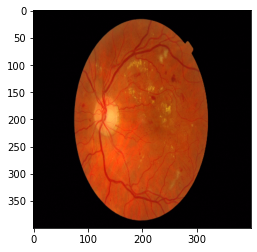

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from numpy import std, mean, sqrt, max, min, exp
img=cv2.imread("Dataset_12/TrainSet/2/20051020_45137_0100_PP.tif")
img=cv2.resize(img, (400, 400))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

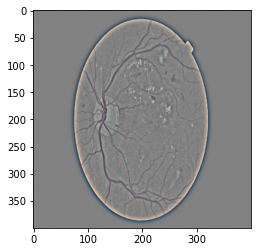

In [ ]:
plt.imshow(preProcessing(img))

In [ ]:
y_pred = model.predict(test)

In [ ]:
modela.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 185856)            54336736  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               95158784  
_________________________________________________________________
activation_614 (Activation)  (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_615 (Activation)  (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_616 (Activation)  (None, 128)              

In [ ]:
import tensorflow
from tensorflow.keras.utils import plot_model

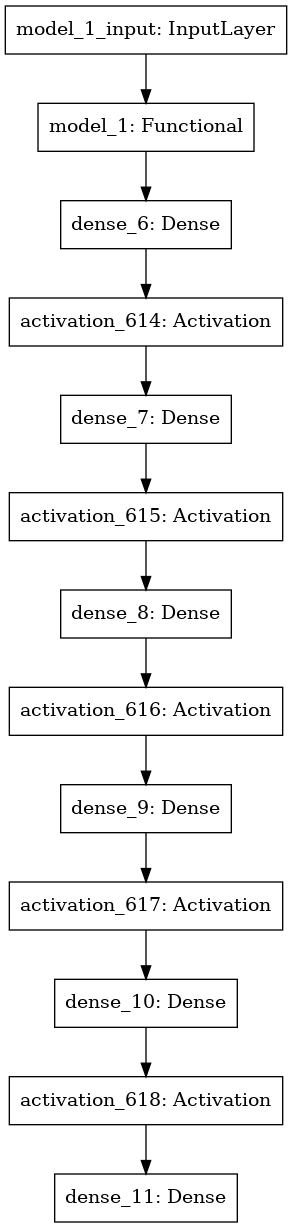

In [ ]:
plot_model(modela)

In [ ]:
a=m